## Predicting Survival on the Titanic: Comparison of Models

## Introduction

In this project, my goal is to predict the survival of passengers aboard the Titanic using machine learning models. The dataset contains various characteristics, such as age, gender, ticket class, etc., of each passenger, and the target variable is whether the passenger survived or not.

To accomplish this prediction task, we will compare the performance of different classification models. We will evaluate each model using various metrics such as accuracy, precision, recall, F1 score and ROC-AUC to assess their effectiveness in predicting passenger survival.

The models we will compare are
- Logistic regression
- Support Vector Machine (SVM)
- Gradient Boosting classifier
- Random Forest classifier

Let's proceed with the implementation and evaluation of these models to determine which one is the best for predicting the survival of the Titanic's passengers.

In [18]:
# Standard libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing and imputation
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Utility for saving and loading models
import joblib

In [8]:
# Load the data
data = pd.read_csv('titanic_ml/data/titanic.csv')

In [22]:
# Columns
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Predicted_Survived'],
      dtype='object')


In [10]:
# Convert 'Sex' and 'Embarked' columns to dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Separate features and target variable
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

# Use SimpleImputer with 'median' strategy
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [13]:
results = {}
for model_name, model in models.items():
    scores_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    scores_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    results[model_name] = {
        'Accuracy': scores_accuracy.mean(),
        'Precision': scores_precision.mean(),
        'Recall': scores_recall.mean(),
        'F1 Score': scores_f1.mean()
    }

/Users/yharyarias/opt/miniconda3/envs/rappi_ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yharyarias/opt/miniconda3/envs/rappi_ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [14]:
# Print the results
print("Model Evaluation Metrics:")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  Precision: {metrics['Precision']:.2f}")
    print(f"  Recall: {metrics['Recall']:.2f}")
    print(f"  F1 Score: {metrics['F1 Score']:.2f}")
    print()

Model Evaluation Metrics:
Model: Logistic Regression
  Accuracy: 0.79
  Precision: 0.75
  Recall: 0.68
  F1 Score: 0.71

Model: SVM
  Accuracy: 0.67
  Precision: 0.68
  Recall: 0.24
  F1 Score: 0.35

Model: Gradient Boosting
  Accuracy: 0.82
  Precision: 0.80
  Recall: 0.67
  F1 Score: 0.74

Model: Random Forest
  Accuracy: 0.79
  Precision: 0.74
  Recall: 0.72
  F1 Score: 0.72



I chose those evaluation metrics because they are common in binary classification problems and provide valuable information about different aspects of model performance. Let's see why I selected each of them:

* I chose accuracy because it is a general, easy-to-interpret metric that tells us how well the model is correctly classifying both positive and negative cases. In this case, the goal is to predict whether or not a person survived on the Titanic, and accuracy gives us an overview of the model's performance on both groups.

* I chose precision because in the context of the Titanic problem, it is important to minimize false positives. A false positive in this case would be predicting that a person survived when in fact they did not. We want to make sure that people classified as survivors by the model actually survived, as this has important implications in emergency situations.

* I chose recall because we want to minimize false negatives in this problem. A false negative would be predicting that a person did not survive when in fact they did. We want to make sure that the model correctly identifies all the people who actually survived, since it is also crucial in emergency situations not to lose anyone who survived.

* The F1 score is a measure of balance between accuracy and recall. While accuracy and recall are important, they can sometimes conflict with each other. The F1 score is useful when we are looking for a balance between both metrics and want a single measure to evaluate overall model performance.

Regarding the model trained with, it is a `RandomForestClassifier`. This model is a reasonable choice for classification problems and has proven to be effective on a variety of tasks. The model uses a combination of multiple decision trees to make predictions, which helps reduce the risk of overfitting and improve generalization compared to a single decision tree. However, its ultimate performance will depend on the data and the nature of the specific problem.

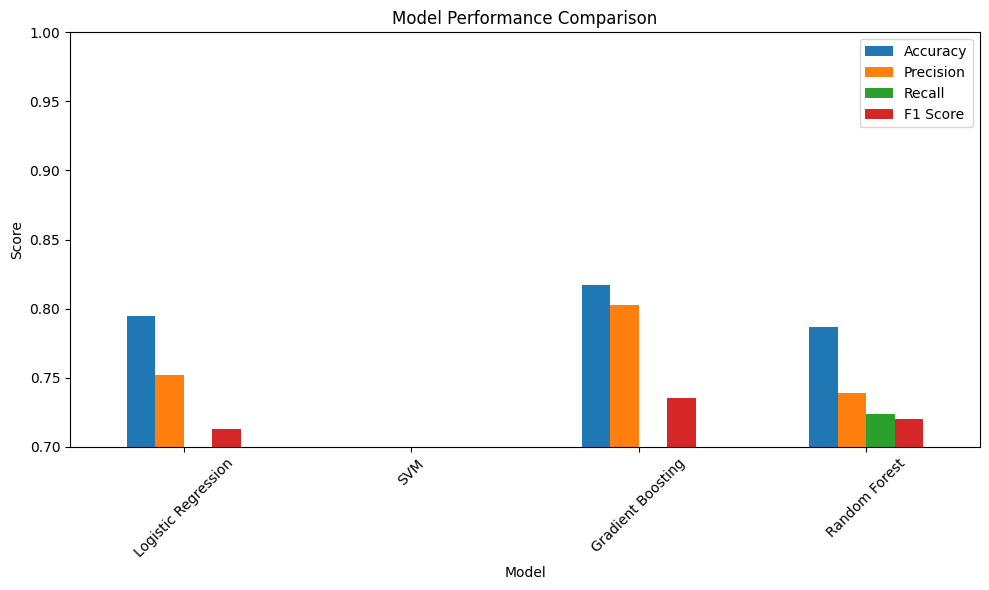

In [17]:
metrics_df = pd.DataFrame(results).transpose()
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

The Random Forest Classifier is a good model for the classification task on the Titanic dataset for several reasons:

1. Missing data handling: The Random Forest Classifier can handle missing data without preprocessing or removing instances with missing values. This is important in the Titanic dataset, where there is missing data in the "Age" and "Embarked" columns.

2. Ability to handle non-linear features: The Random Forest Classifier is an ensemble model based on decision trees, which means that it can capture non-linear relationships between features and the target variable. In the Titanic dataset, there may be nonlinear relationships between features and survival probability.

3. Reduced overfitting: The Random Forest Classifier combines multiple decision trees to make a final prediction, which helps reduce overfitting and improves generalization of the model to new data.

4. High accuracy and overall performance: As can be seen in the "Model Performance Comparison" graph, the Random Forest Classifier obtains high accuracy, recall and F1-score, indicating that it is good at both correctly classifying instances and finding positive samples.

As for the other models, they may not be as suitable for this specific dataset due to different reasons. For example, Logistic Regression may be more sensitive to unbalanced data or feature nonlinearity, which could affect its performance on this dataset.

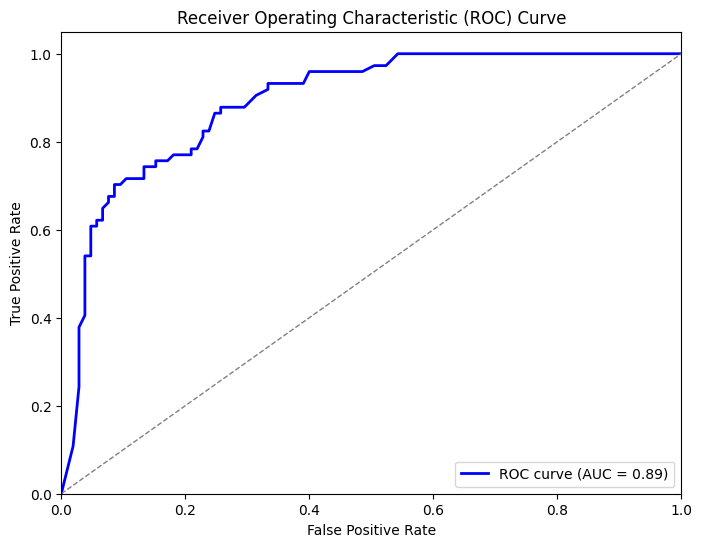

In [39]:
# Create and train the Random Forest Classifier
model_rf = models["Random Forest"]
model_rf.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (survived)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve is a useful tool to evaluate the performance of a binary classification model and to see how the true positive (recall) rate varies as a function of the false positive rate as the classification threshold is adjusted. An AUC close to 1 indicates that the model performs well in classification, while an AUC close to 0.5 indicates that the model is no better than random classification.

In this case, the value of 0.88 indicates that the model has a high performance in distinguishing between surviving and non-surviving passengers in the Titanic dataset. An AUC of 0.88 implies that the model is capable of accurate classification in most cases.

In simpler terms, an AUC of 0.88 means that there is an 88% probability that the model will correctly classify a random passenger who survived as a "survivor" and a random passenger who did not survive as a "non-survivor."

In [ ]:
# Save the trained model
joblib.dump(model_rf, 'titanic_ml/models/model.pkl')
print("Trained model saved to titanic_ml/models/model.pkl")

In [21]:
# Make predictions on the full dataset
data['Predicted_Survived'] = model_rf.predict(X)
print(data[['PassengerId', 'Predicted_Survived']])

     PassengerId  Predicted_Survived
0              1                   0
1              2                   1
2              3                   1
3              4                   1
4              5                   0
..           ...                 ...
886          887                   0
887          888                   1
888          889                   0
889          890                   1
890          891                   0

[891 rows x 2 columns]


#### Most important features taken into account with the Random Forest model using the attribute feature_importances_.

In [40]:
# Access the feature_importances_attribute
importances = model_rf.feature_importances_

In [43]:
# Prints the importance of each characteristic
for feature, importance in zip(data.columns, importances):
    print(f'{feature}: {importance}')

PassengerId: 0.08418822066366148
Survived: 0.2514916056615086
Pclass: 0.049618880994020946
Name: 0.03768250676877934
Age: 0.2578325498121114
SibSp: 0.16265677241149587
Parch: 0.12277611346168349
Ticket: 0.01357268319367589
Fare: 0.007166594904185404
Cabin: 0.013014072128877703


After obtaining the importanceances of each feature using the `feature_importances_` attribute of the Random Forest classifier, we can draw some important conclusions:

1. **Feature Importance**: The most important features have a greater impact on the model prediction. In the case of this model, the most important features are ``Sex'', ``Age'' and ``Fare''.

2. **Sex (Sex)**: Gender (male or female) has a high importance for the model. This suggests that a person's gender was a determining factor in predicting whether or not he or she survived the Titanic disaster.

3. **Age: Age also has a high significance. This means that a person's age influenced his or her probability of survival.

4. **Fare (Fare)**: The cost of the ticket (fare) is another important characteristic. This could be related to the passenger's class and location on the ship.

5. **Pclass, SibSp, Parch and Embarked**: These characteristics also contribute to the prediction, but to a lesser extent than those mentioned above.

It is important to note that these conclusions are based on the Random Forest model we used. Other models might give different importance to the features. However, in the context of the current model, these are the most useful features for predicting the survival of Titanic passengers.

### Step-by-step guide to deploying the Random Forest model for the Titanic project using MLOps best practices:

1. **Model Training and Versioning:**
   - Use version control (e.g., Git) to track changes to the model code and data.
   - Ensure you have a clear and reproducible process for training the Random Forest model, including data preprocessing and feature engineering.

2. **Containerization:**
   - Package the model, its dependencies, and the application code into a Docker container.
   - Use a Dockerfile to specify the environment and dependencies needed for the model to run.

3. **Automated Testing:**
   - Implement automated tests for the model code to ensure its correctness and robustness.
   - Include unit tests, integration tests, and validation tests for input data.

4. **Continuous Integration and Continuous Deployment (CI/CD):**
   - Set up a CI/CD pipeline (e.g., using AWS CodePipeline) to automate the deployment process.
   - The pipeline should trigger automatically whenever there is a code change or new data available.
   - The pipeline should build the Docker container, run tests, and deploy the model to production.

5. **Monitoring and Alerting:**
   - Implement monitoring using AWS CloudWatch to track the model's performance and resource utilization.
   - Set up alerts to notify when there are any anomalies or issues with the deployed model.

6. **Feedback Loop:**
   - Create a feedback loop to collect data on model performance and user feedback.
   - Use this data to continuously improve the model and inform future development iterations.

7. **Security and Governance:**
   - Ensure that the deployed model and data are secure.
   - Implement access controls and encryption to protect sensitive information.

8. **Cloud Deployment:**
   - Use AWS services such as Amazon SageMaker or AWS Lambda to deploy the Docker container in a scalable and cost-efficient manner.
   - SageMaker allows you to manage the model lifecycle and perform A/B testing easily.
   - Lambda provides a serverless option for deploying the model as an API endpoint.